# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data
print('Looking for data files under: {}'.format(os.getcwd()))

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_test_raw = test['features']

Looking for data files under: /home/carnd/CarND-LeNet-Lab


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
# X_train is a Numpy ndarray.  The 1st dimension is the number of images so can use .shape[0] or .len
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
# Get the shape of the first image (they are all the same size)
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

----
Display the first image of each sign type found in the training data set.
Display a histogram of sign counts by type for the training, validation, and test data sets.

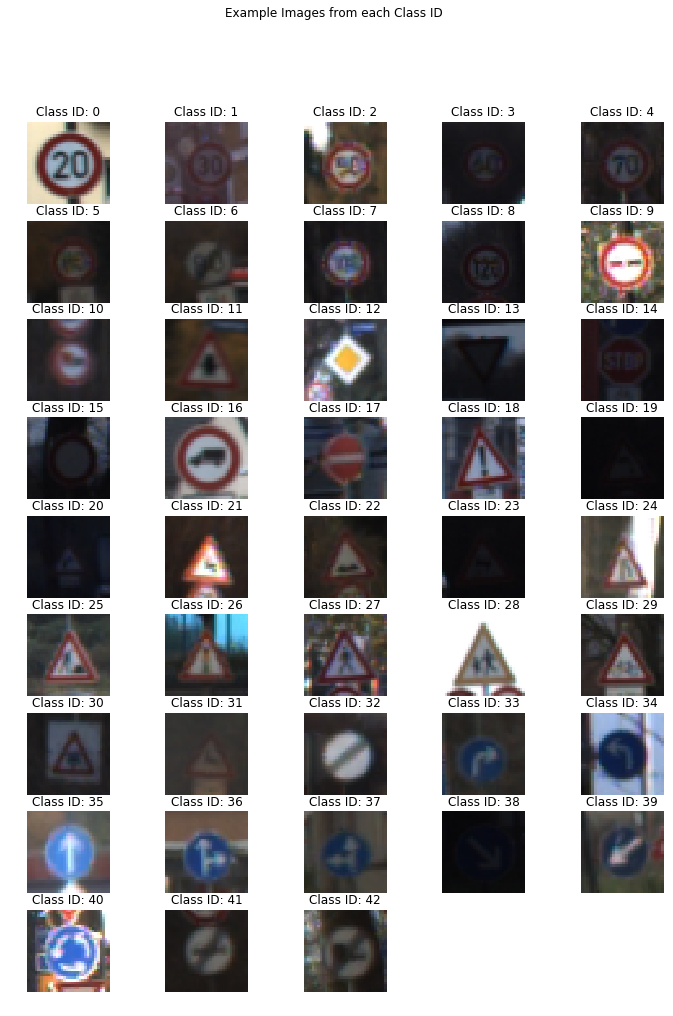

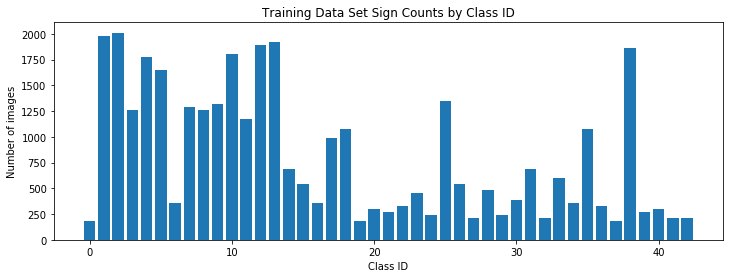

Image count for smallest class = 180
Image count for largest class = 2010


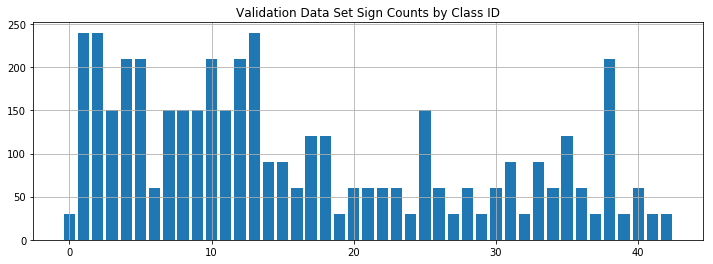

Image count for smallest class = 30
Image count for largest class = 240


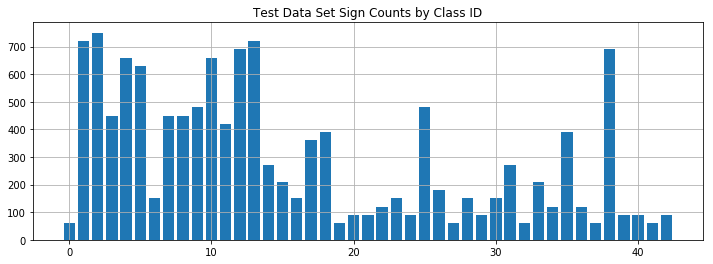

Image count for smallest class = 60
Image count for largest class = 750


In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

train_class_counts=[]
plt.figure(figsize=(12, 16))

for i in range(n_classes):
    plt.subplot(9, 5, i + 1)
    ith_class_images = X_train[y_train == i]
    plt.imshow(ith_class_images[1, :, :, :]) #draw the first image of each class
    plt.title('Class ID: {}'.format(i))
    plt.axis('off')
    train_class_counts.append(len(ith_class_images))

plt.suptitle('Example Images from each Class ID')
plt.show()

#Plot the number of images per class for the trainging dataset
plt.figure(figsize=(12, 4))
plt.title("Training Data Set Sign Counts by Class ID")
plt.bar(range(0, n_classes), train_class_counts)
plt.xlabel("Class ID")
plt.ylabel("Number of images")
plt.show()

print("Image count for smallest class =", min(train_class_counts))
print("Image count for largest class =", max(train_class_counts))

#Plot the number of images per class for the validation dataset
valid_unique_IDs, valid_class_counts = np.unique(y_valid, return_counts=True)
plt.figure(figsize=(12, 4))
plt.title("Validation Data Set Sign Counts by Class ID")
plt.bar(valid_unique_IDs, valid_class_counts)
plt.grid()
plt.show()

print("Image count for smallest class =", min(valid_class_counts))
print("Image count for largest class =", max(valid_class_counts))

#Plot the number of images per class for the test dataset
test_unique_IDs, test_class_counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(12, 4))
plt.title("Test Data Set Sign Counts by Class ID")
plt.bar(test_unique_IDs, test_class_counts)
plt.grid()
plt.show()

print("Image count for smallest class =", min(test_class_counts))
print("Image count for largest class =", max(test_class_counts))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Augment the Data Set
There's a big variation in the image count across the class IDs.  Going to augment the data set by synthesizing new images from the original images.

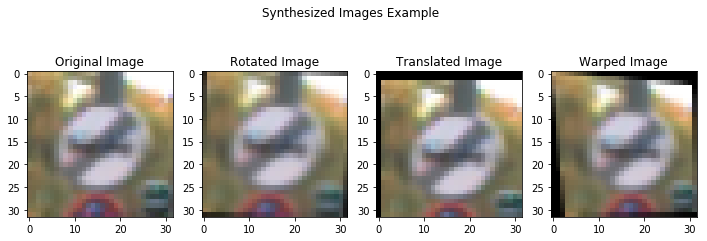

In [4]:
# functions to transform images
import cv2
import random

def rotate_img(img):
    x_center, y_center = int(img.shape[0]/2), int(img.shape[1]/2)
    angle = 30.0*np.random.rand()-15
    M = cv2.getRotationMatrix2D((x_center, y_center), angle, 1.0)
    return cv2.warpAffine(img, M, img.shape[:2])

def translate_img(img):
    M = np.float32([[1, 0, np.random.randint(-3, 3)], [0, 1, np.random.randint(-3, 3)]])
    return cv2.warpAffine(img, M, img.shape[:2])

def warp_img(img):
    random_higher_bound = random.randint(27, 32)
    random_lower_bound = random.randint(0, 5)
    points_one = np.float32([[0,0],[32,0],[0,32],[32,32]])
    points_two = np.float32([[0, 0], [random_higher_bound, random_lower_bound], [random_lower_bound, 32],[32, random_higher_bound]])
    M = cv2.getPerspectiveTransform(points_one, points_two)
    return cv2.warpPerspective(img, M, img.shape[:2])


def show_transforms(img):
    f, axarr = plt.subplots(1, 4, figsize=(12,4))
    f.suptitle('Synthesized Images Example')
    axarr[0].set_title('Original Image')
    axarr[0].imshow(img)
    axarr[1].set_title('Rotated Image')
    axarr[1].imshow(rotate_img(img))
    axarr[2].set_title('Translated Image')
    axarr[2].imshow(translate_img(img))
    axarr[3].set_title('Warped Image')
    axarr[3].imshow(warp_img(img))


show_transforms(X_train[100])

#### Augment the test data set with synthesized images
Ensure each sign class has at least 750 images by adding synthesized images.

Adding Images to Class ID: 0
Will use 190 original images to synthesize images.
Now have a total of 35369 training images
Adding Images to Class ID: 6
Will use 130 original images to synthesize images.
Now have a total of 35759 training images
Adding Images to Class ID: 14
Will use 20 original images to synthesize images.
Now have a total of 35819 training images
Adding Images to Class ID: 15
Will use 70 original images to synthesize images.
Now have a total of 36029 training images
Adding Images to Class ID: 16
Will use 130 original images to synthesize images.
Now have a total of 36419 training images
Adding Images to Class ID: 19
Will use 190 original images to synthesize images.
Now have a total of 36989 training images
Adding Images to Class ID: 20
Will use 150 original images to synthesize images.
Now have a total of 37439 training images
Adding Images to Class ID: 21
Will use 160 original images to synthesize images.
Now have a total of 37919 training images
Adding Images to Cla

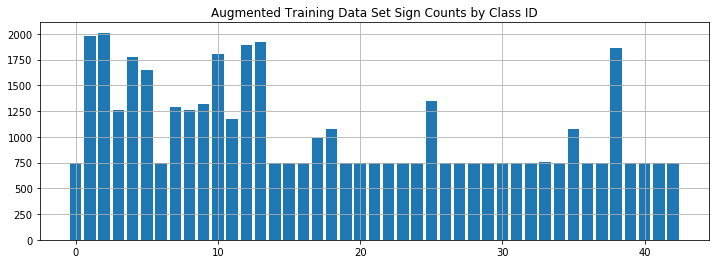

Image count for smallest class = 750
Image count for largest class = 2010


In [5]:
for id in range(n_classes):
    if train_class_counts[id] < 750:
        class_indices = np.where(y_train == id)[0]
        print('Adding Images to Class ID: {}'.format(id))
        print('Will use {} original images to synthesize images.'.format(int(np.ceil((750 - train_class_counts[id])/3)), ))
        for i in range(int(np.ceil((750 - train_class_counts[id])/3))):
            source_image_index = class_indices[i % train_class_counts[id]]
            X_train = np.concatenate((X_train, [translate_img(X_train[source_image_index])]), axis=0)
            y_train = np.concatenate((y_train, [id]), axis=0)
            X_train = np.concatenate((X_train, [rotate_img(X_train[source_image_index])]), axis=0)
            y_train = np.concatenate((y_train, [id]), axis=0)
            X_train = np.concatenate((X_train, [warp_img(X_train[source_image_index])]), axis=0)
            y_train = np.concatenate((y_train, [id]), axis=0)
        print('Now have a total of {} training images'.format(len(X_train)))

train_unique_IDs, train_class_counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(12, 4))
plt.title("Augmented Training Data Set Sign Counts by Class ID")
plt.bar(train_unique_IDs, train_class_counts)
plt.grid()
plt.show()

print("Image count for smallest class =", min(train_class_counts))
print("Image count for largest class =", max(train_class_counts))
            
            
    

Synthesizing the images takes awhile so saving the augmented data set and its labels to disk.

In [6]:
# Save augmented training set to disk
with open("aumented_training_set.p", mode='wb') as f:
    pickle.dump(X_train, f)

# Save augmented training set labels to disk
with open("aumented_training_set_labels.p", mode='wb') as f:
    pickle.dump(y_train, f)


As a sanity check, view a few examples of the newly synthesized images.  Note they have already been normalized at this point so the colors are going to be off.

labels: 0 15 20 22


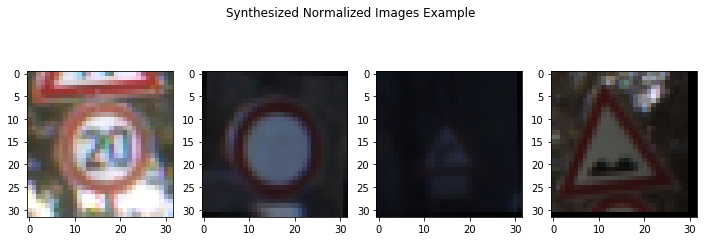

In [7]:
f, axarr = plt.subplots(1, 4, figsize=(12,4))
f.suptitle('Synthesized Normalized Images Example')
axarr[0].imshow(X_train[35000])
axarr[1].imshow(X_train[36000])
axarr[2].imshow(X_train[37000])
axarr[3].imshow(X_train[38000])
print('labels: {} {} {} {}'.format(y_train[35000], y_train[36000], y_train[37000], y_train[38000]))

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
def normalize(X):
    # Normailize values to be between -0.5 and 0.5.  Always want to perform feature scaling so we have zero mean and unit variance.
    # Here, we are not calculating the mean or variance of the data, just asssuming it will have a mean of 128 and vary from 0 to 255 for each color channel. 
    return X / 255 - 0.5

X_train, X_valid, X_test = normalize(X_train), normalize(X_valid), normalize(X_test)

# Shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
print(X_train.shape)


(45182, 32, 32, 3)


# Model Architecture
Based on the LeNet architecture with dropout applied to the fully connected layers.

## Input
32x32 pixels with a depth of 3 color channels.

## Architecture
### Layer 1
**Convolutional.**
Input: 32x32x3
Output shape: 28x28x6

**ReLU Activation.** 

**Pooling.**
Max pooling done with a 2x2 kernel using a stride of 2 for horizontal and vertical.
Output shape: 14x14x6

### Layer 2
**Convolutional.**
Output shape: 10x10x16.

**ReLU Activation.**

**Pooling.**
Max pooling done with a 2x2 kernel using a stride of 2 for horizontal and vertical.
Output shape: 5x5x16

**Flatten.**
Flatten the output to 1D.
Output: 400 x 1

### Layer 3 
**Fully Connected.**
Output: 120 x 1

**ReLU Activation.**
Dropout with .5 keep probability applied here during training.

### Layer 4
**Fully Connected.**
Output: 84 x 1

**ReLU Activation.**
Dropout with .5 keep probability applied here during training.

### Layer 5
**Fully Connected (Logits).**
Output layer with 43 outputs that are the logits for the 43 traffic sign types.



In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 25
BATCH_SIZE = 128


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1_W, conv2_W

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Define the loss function and the optimzier to be used in training the model.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units during dropout
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits, conv1_W, conv2_W  = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Define the accuracy and evaluate functions to evaluate models.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

Train and validate the model.
The accuracy of the model against the training and validation data sets is reported for each epoch. 

Training...

EPOCH 1 ...
Training Accuracy = 0.687
Training Loss = 1.141
Validation Accuracy = 0.669
Validation Loss = 1.125

EPOCH 2 ...
Training Accuracy = 0.836
Training Loss = 0.638
Validation Accuracy = 0.825
Validation Loss = 0.635

EPOCH 3 ...
Training Accuracy = 0.895
Training Loss = 0.401
Validation Accuracy = 0.873
Validation Loss = 0.457

EPOCH 4 ...
Training Accuracy = 0.924
Training Loss = 0.307
Validation Accuracy = 0.900
Validation Loss = 0.375

EPOCH 5 ...
Training Accuracy = 0.936
Training Loss = 0.244
Validation Accuracy = 0.913
Validation Loss = 0.317

EPOCH 6 ...
Training Accuracy = 0.951
Training Loss = 0.203
Validation Accuracy = 0.919
Validation Loss = 0.287

EPOCH 7 ...
Training Accuracy = 0.960
Training Loss = 0.182
Validation Accuracy = 0.920
Validation Loss = 0.292

EPOCH 8 ...
Training Accuracy = 0.962
Training Loss = 0.155
Validation Accuracy = 0.929
Validation Loss = 0.245

EPOCH 9 ...
Training Accuracy = 0.970
Training Loss = 0.122
Validation Accuracy = 0

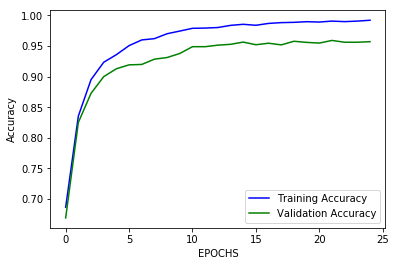

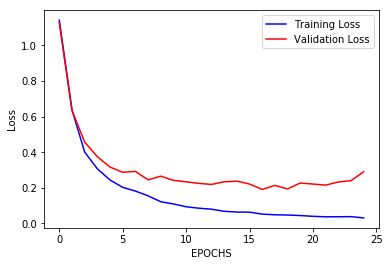

Model saved


In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    train_accuracies = []
    train_losses = []
    valid_accuracies = []
    valid_losses = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        train_accuracy, train_loss = evaluate(X_train, y_train)
        train_accuracies.append(train_accuracy)
        train_losses.append(train_loss)
        valid_accuracy, valid_loss = evaluate(X_valid, y_valid)
        valid_accuracies.append(valid_accuracy)
        valid_losses.append(valid_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Training Loss = {:.3f}".format(train_loss))
        print("Validation Accuracy = {:.3f}".format(valid_accuracy))
        print("Validation Loss = {:.3f}".format(valid_loss))
        print()
        
    #plot_curves(train_accuracies, train_losses, valid_accuracies, valid_losses)
    
    print('Length of range(EPOCHS): ', len(range(EPOCHS)))
    print(range(EPOCHS))
    print('Length of train_accuracies: ', len(train_accuracies))
    print(train_accuracies)
    print('Length of train_losses: ', len(train_losses))
    print(train_losses)
    
    %matplotlib inline
    plt.plot(range(EPOCHS),train_accuracies,'b',label ='Training Accuracy')
    plt.plot(range(EPOCHS),valid_accuracies,'g',label ='Validation Accuracy')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    plt.plot(range(EPOCHS),train_losses,'b',label ='Training Loss')
    plt.plot(range(EPOCHS),valid_losses,'r',label ='Validation Loss')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

    saver.save(sess, './lenet')
    print("Model saved")

Test the trained model.

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

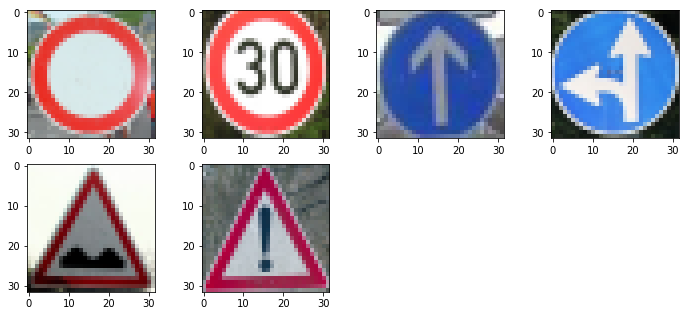

(6, 32, 32, 3)


In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

new_image_path = 'new_images'
labeled_new_images = {'speed-limit-30.png':1, 'ahead-only.png':35, 'straight-or-left.png':37, 'bumpy-road.png':22, 'general-caution.png':18, 'no-vehicles.png':15}
image_list = []
y_new = []

plt.figure(figsize=(12, 8))
subplot_id = 1

for i in labeled_new_images:
    #image = plt.imread('{}/{}'.format(new_image_path, i))
    image = cv2.imread('{}/{}'.format(new_image_path, i))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(3, 4, subplot_id)
    plt.imshow(image)
    image_list.append(np.array(image))
    y_new.append(labeled_new_images[i])
    subplot_id += 1
    
plt.show()
X_new = np.asarray(image_list)
# matplot lib reads PNG files with pixel values ranging from 0 to 1 whereas the orinal data sets range from 0 to 255.
# See https://discussions.udacity.com/t/0-accuracy-for-new-images/226265/28
# So for the Normalize function to work, the new images need to be converted to range from 0 to 255.
#X_new = X_new * 255

print(X_new.shape)



### Predict the Sign Type for Each Image

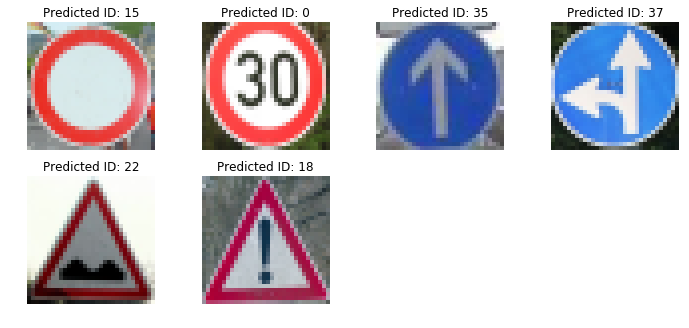

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Normailize the new data set
X_new_norm = normalize(X_new)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    predicted_logits = sess.run(logits, feed_dict={x: X_new_norm, keep_prob:1.})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    
plt.figure(figsize=(12,8))

for i in range(6):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_new[i])
    plt.title('Predicted ID: {}'.format(predicted_labels[i]))
    plt.axis('off')
plt.show()




### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    test_accuracy, test_loss = evaluate(X_new_norm, y_new)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    X_new_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_new_norm, keep_prob: 1.0})
    X_new_top_k = sess.run(top_k, feed_dict={x: X_new_norm, keep_prob: 1.0})


for i in range(6):
    print ('Image #{}'.format(i))
    for j in range(5):
        print('  logit ranked #{}:'.format(j + 1))
        print('     Probablity: {}'.format(X_new_top_k[0][i][j]))
        print('     Sign ID: {}'.format(X_new_top_k[1][i][j]))
    

Image #0
  logit ranked #1:
     Probablity: 0.9962067604064941
     Sign ID: 15
  logit ranked #2:
     Probablity: 0.0016332280356436968
     Sign ID: 32
  logit ranked #3:
     Probablity: 0.0011647774372249842
     Sign ID: 13
  logit ranked #4:
     Probablity: 0.000438211573055014
     Sign ID: 39
  logit ranked #5:
     Probablity: 0.00023985384905245155
     Sign ID: 26
Image #1
  logit ranked #1:
     Probablity: 0.9884748458862305
     Sign ID: 0
  logit ranked #2:
     Probablity: 0.011522348038852215
     Sign ID: 1
  logit ranked #3:
     Probablity: 2.528830464143539e-06
     Sign ID: 28
  logit ranked #4:
     Probablity: 3.891424285029643e-07
     Sign ID: 27
  logit ranked #5:
     Probablity: 2.7704800231731497e-08
     Sign ID: 24
Image #2
  logit ranked #1:
     Probablity: 0.9997001886367798
     Sign ID: 35
  logit ranked #2:
     Probablity: 0.00013589684385806322
     Sign ID: 34
  logit ranked #3:
     Probablity: 6.764916179236025e-05
     Sign ID: 33
  logit 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")